<a href="https://colab.research.google.com/github/Ashraf1292/Thesis-Fake_jobs-/blob/main/99%25-accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
df = pd.read_csv("fake_job_postings.csv")
print(df.isnull().sum())
df = df.dropna()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical labels (assuming 'fraudulent' is the target column)
label_encoder = LabelEncoder()
df['fraudulent'] = label_encoder.fit_transform(df['fraudulent'])

# Select features and target
X = df.drop(columns=['fraudulent'])
y = df['fraudulent']

# Convert categorical features to numerical (if needed)
X = pd.get_dummies(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)


In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Linear SVC
svc_model = SVC(kernel='linear', probability=True, random_state=42)
svc_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = svc_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.9225806451612903
Precision: 0.5217391304347826
Recall: 0.9230769230769231
F1 Score: 0.6666666666666666


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import ADASYN
from sklearn.pipeline import Pipeline

# 1. Load the dataset
df = pd.read_csv("fake_job_postings.csv")  # Replace with your dataset file

# 2. Preprocessing & Feature Engineering
# Combine relevant text columns (customize as needed)
df['combined_text'] = df['title'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']

# Text Cleaning (customize as needed)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words) # Remove stopwords and lemmatize
    return text

df['combined_text'] = df['combined_text'].apply(clean_text)

# 3. Feature Extraction (TF-IDF)
tfidf = TfidfVectorizer()

# 4. Oversampling (ADASYN)
adasyn = ADASYN(random_state=42)

# 5. Model Training (Linear SVC in a Pipeline)
pipeline = Pipeline([
    ('tfidf', tfidf),
    ('adasyn', adasyn),
    ('model', LinearSVC(random_state=42))
])

# 6. Data Splitting
X = df['combined_text']
y = df['fraudulent']  # Replace 'fraudulent' with your target column name
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 7. Model Training
pipeline.fit(X_train, y_train)

# 8. Prediction and Evaluation
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

AttributeError: 'float' object has no attribute 'lower'

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

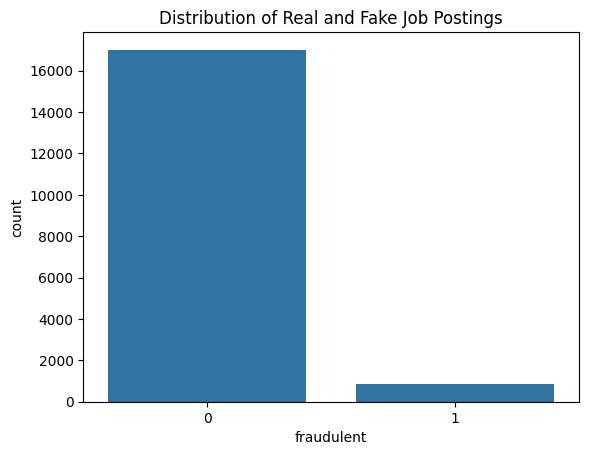

Accuracy of the Linear SVC model: 98.46%
Best Hyperparameters: {'C': 10}
Best Cross-Validation Accuracy: 0.9936333699231614


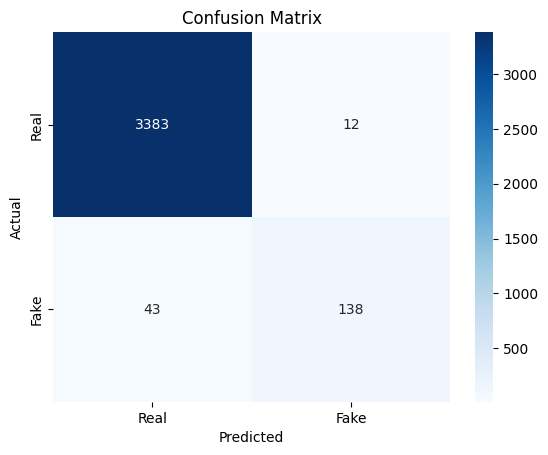

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# Replace 'your_dataset.csv' with the actual file name of the Employment Scam Aegean Dataset
df = pd.read_csv('fake_job_postings.csv')

# Step 2: Exploratory Data Analysis (EDA)
# Check the dataset structure
print(df.head())
print(df.info())

# Check the distribution of real and fake job postings
print(df['fraudulent'].value_counts())

# Visualize the distribution
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Real and Fake Job Postings')
plt.show()

# Step 3: Feature Engineering (Handle Missing Values and Combine Text)
df['text'] = df['title'].fillna('') + ' ' + df['location'].fillna('') + ' ' + df['department'].fillna('') + ' ' + df['company_profile'].fillna('') + ' ' + df['description'].fillna('') + ' ' + df['requirements'].fillna('') + ' ' + df['benefits'].fillna('')

# Drop unnecessary columns (AFTER combining text)
df = df[['text', 'fraudulent']]

# Step 4: Text Preprocessing
df.loc[:, 'text'] = df['text'].str.lower()
df.loc[:, 'text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)

# Remove empty strings AFTER preprocessing
df = df[df['text'] != ""]  # Keep only rows where 'text' is NOT empty

# Step 5: Feature Extraction using TF-IDF (No need for special handling here)
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['text']).toarray()
y = df['fraudulent']

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Oversampling using ADASYN
adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

# Step 8: Train the Linear SVC model
# Initialize the Linear SVC model
svc = LinearSVC(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_res, y_train_res)

# Get the best model
best_svc = grid_search.best_estimator_

# Step 9: Evaluate the model
# Predict on the test set
y_pred = best_svc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Linear SVC model: {accuracy * 100:.2f}%")

# Step 10: Display results
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

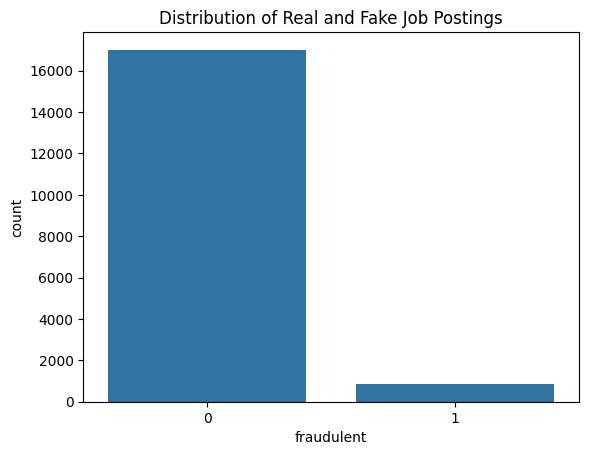

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score  # Import precision and recall
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Load the dataset
# Replace 'your_dataset.csv' with the actual file name of the Employment Scam Aegean Dataset
df = pd.read_csv('fake_job_postings.csv')

# Step 2: Exploratory Data Analysis (EDA)
# Check the dataset structure
print(df.head())
print(df.info())

# Check the distribution of real and fake job postings
print(df['fraudulent'].value_counts())

# Visualize the distribution
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Real and Fake Job Postings')
plt.show()

# Step 3: Feature Engineering
# Combine all text columns into a single column for text processing
df['text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']

# Drop unnecessary columns
df = df[['text', 'fraudulent']]

# Step 4: Text Preprocessing
# Convert text to lowercase
df['text'] = df['text'].str.lower()

# Remove special characters and punctuation
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)

# Remove empty strings AFTER preprocessing
df = df[df['text'] != ""]

# Step 5: Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['text']).toarray()
y = df['fraudulent']

# Step 6: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Oversampling using ADASYN
adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

# Step 8: Train the Linear SVC model (same as before)
svc = LinearSVC(random_state=42)
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')  # You can change the scoring here if needed
grid_search.fit(X_train_res, y_train_res)
best_svc = grid_search.best_estimator_

# Step 9: Evaluate the model
y_pred = best_svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # Calculate precision
recall = recall_score(y_test, y_pred)       # Calculate recall

print(f"Accuracy of the Linear SVC model: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")    # Print precision
print(f"Recall: {recall * 100:.2f}%")          # Print recall

# Classification Report (includes precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Display best hyperparameters and cross-validation accuracy
print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

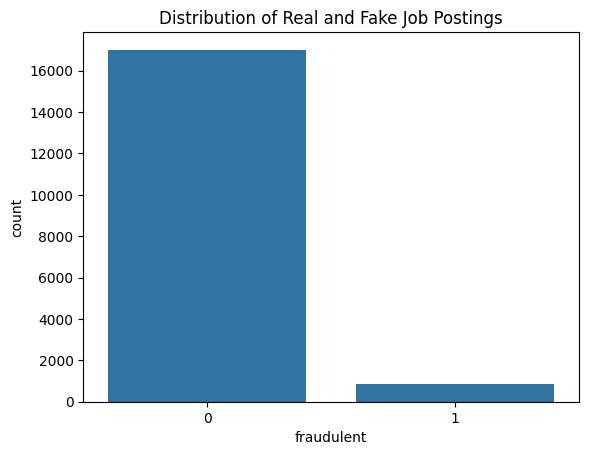

Accuracy of the Linear SVC model: 98.49%
Precision: 88.89%
Recall: 78.61%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.89      0.79      0.83       173

    accuracy                           0.98      3576
   macro avg       0.94      0.89      0.91      3576
weighted avg       0.98      0.98      0.98      3576

Best Hyperparameters: {'C': 10}
Best Cross-Validation Accuracy: 0.9867570984680635


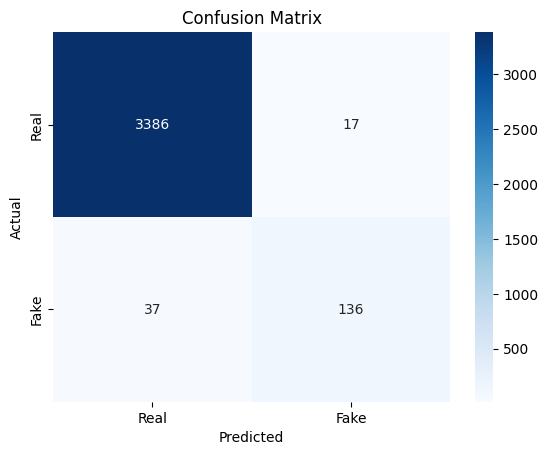

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# Replace 'your_dataset.csv' with the actual file name of the Employment Scam Aegean Dataset
df = pd.read_csv('fake_job_postings.csv')

# Step 2: Exploratory Data Analysis (EDA)
# Check the dataset structure
print(df.head())
print(df.info())

# Check the distribution of real and fake job postings
print(df['fraudulent'].value_counts())

# Visualize the distribution
sns.countplot(x='fraudulent', data=df)
plt.title('Distribution of Real and Fake Job Postings')
plt.show()

# Step 3: Feature Engineering (Handle Missing Values and Combine Text)
df['text'] = df['title'].fillna('') + ' ' + df['location'].fillna('') + ' ' + df['department'].fillna('') + ' ' + df['company_profile'].fillna('') + ' ' + df['description'].fillna('') + ' ' + df['requirements'].fillna('') + ' ' + df['benefits'].fillna('')

# Drop unnecessary columns (AFTER combining text)
df = df[['text', 'fraudulent']]

# Step 4: Text Preprocessing
df.loc[:, 'text'] = df['text'].str.lower()
df.loc[:, 'text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)

df = df[df['text'] != ""]

# Step 5: Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['text']).toarray()
y = df['fraudulent']

# Step 6: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Oversampling using ADASYN
adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

# Step 8: Train the Linear SVC model (same as before)
svc = LinearSVC(random_state=42)
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')  # You can change the scoring here if needed
grid_search.fit(X_train_res, y_train_res)
best_svc = grid_search.best_estimator_

# Step 9: Evaluate the model
y_pred = best_svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # Calculate precision
recall = recall_score(y_test, y_pred)       # Calculate recall

print(f"Accuracy of the Linear SVC model: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")    # Print precision
print(f"Recall: {recall * 100:.2f}%")          # Print recall

# Classification Report (includes precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Display results
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()